## Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-
1.	Product - The model no. of the treadmill
2.	Age -  Age of the customer in no of years
3.	Gender - Gender of the customer
4.	Education - Education of the customer in no. of years
5.	Marital Status - Marital status of the customer
6.	Usage - Avg. # times the customer wants to use the treadmill every week
7.	Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8.	Income - Income of the customer
9.	Miles- Miles that a customer expects to run
 


### OBJECTIVE OF PROJECT
Explore the dataset to identify differences between the customers of each product. 
You can also explore relationships between the different attributes of the customers. 
You can approach it from any other line of questioning that you feel could be relevant for the business. 
The idea is to get you comfortable working in Python.

You are expected to do the following :
Come up with a customer profile (characteristics of a customer) of the different products
Perform univariate and multivariate analyses
Generate a set of insights and recommendations that will help the company in targeting new customers.


### DATA EXPLORATION

- importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#creating dataframe and assigning 
my_dataframe = pd.read_csv("CardioGoodFitness-1.csv")

In [8]:
#checking the first 5 columns of the dataframe
my_dataframe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#check for the data types 
my_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
#check for the size of the data
my_dataframe.shape

(180, 9)

In [106]:
my_dataframe.groupby("Product",as_index=False)["Usage"].value_counts()

,Product,Usage,count
0,TM195,3,37
1,TM195,4,22
2,TM195,2,19
3,TM195,5,2
4,TM498,3,31
5,TM498,2,14
6,TM498,4,12
7,TM498,5,3
8,TM798,4,18
9,TM798,5,12


In [29]:
#grouping the data byproduct and gender
my_dataframe.groupby(["Product","Gender"],as_index=False)["Fitness"].count()

,Product,Gender,Fitness
0,TM195,Female,40
1,TM195,Male,40
2,TM498,Female,29
3,TM498,Male,31
4,TM798,Female,7
5,TM798,Male,33


In [7]:
#check for null values
my_dataframe.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
#check for the number of product
my_dataframe["Product"].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [17]:
#check for unique values
my_dataframe.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

<b>- From the above data exploration it can be seen that the are no null values in the dataframe. 
    - The datatype are of the same with the column.
    - There 3 unique products.
<b/>

In [18]:
# checking for values in the usage
my_dataframe["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

### Data visualization

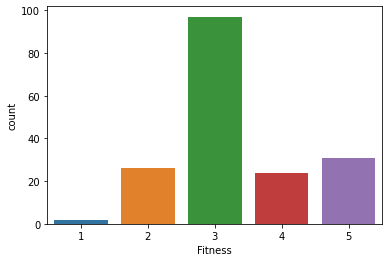

In [21]:
#check for fitness score of customers
sns.countplot(data= my_dataframe, x= "Fitness")

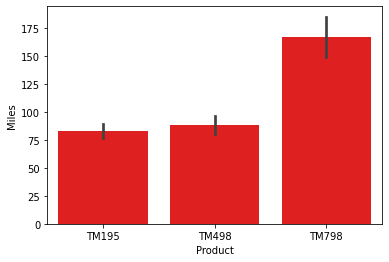

In [16]:
sns.barplot(my_dataframe, x="Product",y="Miles",color="red")


- From the count plot below it can be deduced that the productTM195 have the highest number of usage.
- The product TM798 have the lowest number of usage.

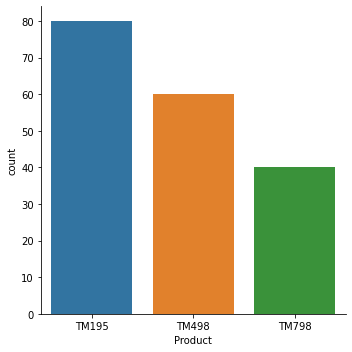

In [75]:
sns.catplot(my_dataframe,x="Product", kind="count")
plt.title("Distribution of Product ")

- check for customers useage and fitness score
- this is to check forthe fit ness level of people with the minmum amount of usage level comparing how fit
- they are and thetype of product they use 
- from this it can be deduced that the TM798 product has less number of  average usage level while other products have customers using them


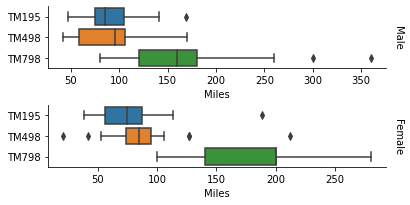

In [53]:
cus = sns.catplot(
            data = my_dataframe,
            y="Product", x="Miles",row="Gender",
            kind="box",orient="h",
            sharex=False, margin_titles=True,
            height=1.5, aspect =4)
cus.set(xlabel="Miles",ylabel="")
cus.set_titles(row_template="{row_name}")
plt.title("Distribution of Product by Miles and gender")

- From the above it can be concluded that the product TM798 have less number of fitness 

- From the above it can be deduced that females using the product TM798 cover more miles,the male than using the product TM789

Text(0.5, 1.0, 'Distribution of Customers Age by Fitness')

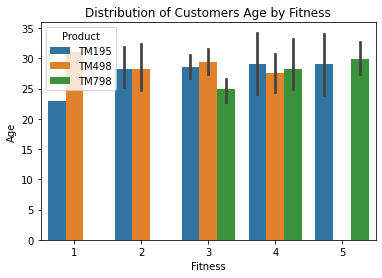

In [38]:
sns.barplot(my_dataframe,y="Age",x="Fitness",hue="Product")
plt.title("Distribution of Customers Age by Fitness")

- From the distribution of customer age by fitness using products as conditions,
- The product TM498 do not have customers from the fitness category of 5,
- also the product TM798 do not have customers in the minimum fitness category.

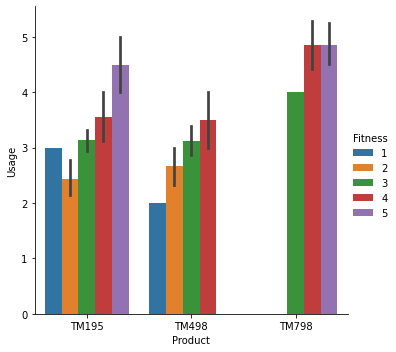

In [31]:
# checking  the data by product, fitness and gender to get the total number of usage
sns.catplot(my_dataframe,y="Usage",x="Product", kind='bar',hue="Fitness")

- From the distribution of customer usage by product with the condition fitness, 
- The product TM498 have the customers with the least amount of usage.
- The product TM798 have more customer usage than other product.

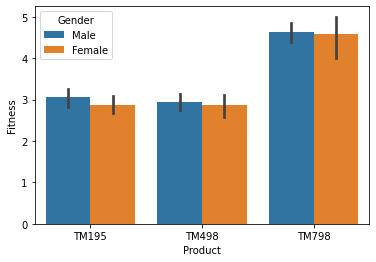

In [39]:
sns.barplot(my_dataframe,y="Fitness",x="Product",hue="Gender",)

In [43]:
my_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [54]:
my_dataframe.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [58]:
my_dataframe.groupby(["Product","Gender"],as_index=False)["Miles"].value_counts() 

,Product,Gender,Miles,count
0,TM195,Female,66,8
1,TM195,Female,75,6
2,TM195,Female,85,5
3,TM195,Female,47,4
4,TM195,Female,113,4
5,TM195,Female,94,4
6,TM195,Female,56,4
7,TM195,Female,38,3
8,TM195,Female,103,1
9,TM195,Female,188,1


In [62]:
my_dataframe["Usage"].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

In [63]:
my_dataframe["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [100]:
my_dataframe[(my_dataframe["Usage"]<=3)&(my_dataframe["Fitness"]>=3)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
3,TM195,19,Male,12,Single,3,3,32973,85
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
...,...,...,...,...,...,...,...,...,...
135,TM498,40,Female,16,Partnered,3,3,61398,85
136,TM498,40,Female,16,Single,3,3,57987,85
137,TM498,40,Male,16,Partnered,3,3,64809,95
139,TM498,48,Male,16,Partnered,2,3,57987,64


In [94]:
#number of customers that uses this product and their fitness level is 3, also the number miles 
my_dataframe[(my_dataframe["Product"]=="TM798")&(my_dataframe["Fitness"]<=3)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,TM798,22,Male,14,Single,4,3,48658,106
153,TM798,25,Male,18,Partnered,4,3,64741,100
157,TM798,26,Female,21,Single,4,3,69721,100
160,TM798,27,Male,18,Single,4,3,88396,100


In [96]:
my_dataframe[(my_dataframe["Product"]=="TM798")&(my_dataframe["Fitness"]<=3)].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,4.000000,4.000000,4.0,4.0,4.000000,4.0
mean,25.000000,17.750000,4.0,3.0,67879.000000,101.5
std,2.160247,2.872281,0.0,0.0,16366.980357,3.0
min,22.000000,14.000000,4.0,3.0,48658.000000,100.0
25%,24.250000,17.000000,4.0,3.0,60720.250000,100.0
50%,25.500000,18.000000,4.0,3.0,67231.000000,100.0
75%,26.250000,18.750000,4.0,3.0,74389.750000,101.5
max,27.000000,21.000000,4.0,3.0,88396.000000,106.0


In [97]:
my_dataframe[(my_dataframe["Product"]=="TM798")&(my_dataframe["Usage"]>=3)].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000
